# Blurring (Bulanıklaştırma) Filtresi

https://abdulsamet-ileri.medium.com/g%C3%B6r%C3%BCnt%C3%BC-filtrelerini-uygulama-ve-kenarlar%C4%B1-alg%C4%B1lama-21d42f194db4

* Bir alan içinde yer alan piksel değerlerinin ortalamasını ifade eder. Buna aynı zaman da Low Pass Filter de denilir. Low pass filter, düşük frekanslara izin veren ve daha yüksek frekansları engelleyen bir filtredir.

* Peki ya bir görüntüde frekans ne demek? Frekans piksel değerlerinin değişim hızını ifade eder. Bu yüzden keskin kenarların (sharped edges), yüksek frekanslı içerik olacağını söyleyebiliriz çünkü piksel değerleri o bölgede hızla değişir.

* Düz alanlar düşük frekanslı içerik olur. Low pass filter kenarları yumuşatır ki bu işlem görüntüdeki gürültüyü azaltmak veya daha az pikselli bir görüntü oluşturmak için kullanılır.

* Low pass filter oluşturmanın basit bir yolu, pikselin (kernelin merkezindeki piksel) bulunduğu bölgedeki değerlerin ortalamasını almaktır. 
* Kernel’in boyutunu, görüntünün ne kadar yumuşak olmasını istediğimize bağlı olarak değişir ve görüntü ona bağlı olarak etkilenir. * Daha büyük bir boyut seçerseniz, daha geniş bir alan üzerinde ortalama olacaksınız ve buda yumuşatma etkisini artıracak. Şimdi low pass filter kernel’imize bakalım.

![low pass filter](https://miro.medium.com/v2/resize:fit:470/format:webp/1*JVDNs3hoh_Q8aAsbWJgbxw.png)

* Blurring uygulamak için iki yöntemimiz var. Birincisi kernelimizi tanımlayıp filter2D fonksiyonu ile, diğeri ise doğrudan blur fonksiyonunu çağırmak ile. Örnekle görelim.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
bgr = cv2.imread('./images/dog.png')

In [10]:
#1. Yol
# 3 X 3 filter
kernel_3x3 = np.ones((3, 3), np.float32) / 9
output = cv2.filter2D(bgr, -1, kernel_3x3)

* filter2D ikinci parametresi depth’i, -1 vererek output resmimizin depth’i, kaynak resmimiz ile aynı olsun diyoruz.

In [11]:
#2. Yol
# 5 X 5 filter
output2 = cv2.blur(bgr, (5, 5))

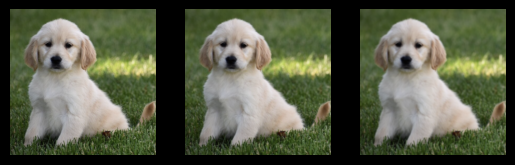

In [12]:
plt.subplot(131)
plt.imshow(cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(133)

plt.imshow(cv2.cvtColor(output2,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

* Burda kernel matrisimizin elemanlarının toplamının 1 olmasını istediğimizden 1/9 ile çarpıyoruz. Bu işleme normalization denilir.
 
* Bunu yapmamızın sebebi o pixel konumundaki intensity’yi (matrisde karşılık gelen değeri yani) artırmamak. 

* Bu yüzden kernel’i görüntüye uygulaman önce bunu yapıyoruz. Eğer normalization yapmasaydık ne olurdu örnekle bakalım.

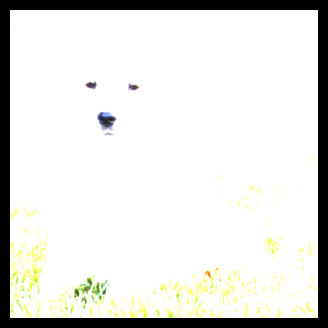

In [14]:
kernel_3x3 = np.ones((3, 3), np.float32)
output = cv2.filter2D(bgr, -1, kernel_3x3)
plt.figure(figsize=(6,4))
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Utg0oaHXF0V_g5_cBiXTNg.png)
* Elemanlar toplamı pozitif olursa parlar.

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*PJb9GWvCg4GGmKRgaRp10A.png)
* Elemanlar toplamı sıfır veya negatif olursa kararır.

* Bundan dolayı kernel’i uygulamadan önce normalize etmemiz gerekmektedir.